In [1]:
#케라스 로딩
import tensorflow.keras

In [2]:
#뉴스 기사 분류 : 다중 분류 문제
#로이터 뉴스를 46개의 토픽으로 분류하는 신경망(다중분류)
# 46개의 토픽, 토픽 별 최소 10개의 샘플
# 데이터 다운로드
from tensorflow.keras.datasets import reuters

#출현 빈도가 높은 단어 10,000개로 제한
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
#8,982개의 학습용 샘플과 2,246개의 검증용 샘플
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
#각 샘플은 정수 리스트
train_data[0][:10]

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207]

In [6]:
#단어 인코딩
#단어 인덱스 다운로드
word_index = reuters.get_word_index()
print(list(word_index.items())[0:10])
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
print(list(reverse_word_index.items())[0:10])

[('mdbl', 10996), ('fawc', 16260), ('degussa', 12089), ('woods', 8803), ('hanging', 13796), ('localized', 20672), ('sation', 20673), ('chanthaburi', 20675), ('refunding', 10997), ('hermann', 8804)]
[(10996, 'mdbl'), (16260, 'fawc'), (12089, 'degussa'), (8803, 'woods'), (13796, 'hanging'), (20672, 'localized'), (20673, 'sation'), (20675, 'chanthaburi'), (10997, 'refunding'), (8804, 'hermann')]


In [7]:
#레이블은 토픽의 인덱스로 0과 45사이의 정수
train_labels[10]

3

In [8]:
#데이터준비
#데이터를 벡터로 변환
import numpy as np

#랜덤시드 고정
np.random.seed(5)
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

#학습용 & 검증용 데이터 벡터 변환
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [9]:
#원핫인코딩
#각 레이블의 인덱스 자리는 1이고 나머지는 모두 0인 벡터
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

#학습용 & 검증용 데이터 벡터 변환
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [10]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [11]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()

#입력층, 노드 64개
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
#은닉층, 노드 64개
model.add(layers.Dense(64, activation='relu'))
#출력층, 노드 46개(소프트맥스, 각 출력 클래스에 대한 확률 분포 출력, 46개의 값을 모두 더하면 1이 됨)
model.add(layers.Dense(46, activation='softmax'))

In [12]:
#softmax 활성화 함수 - 각 입력 샘플마다 46개의 출력 클래스에 대한 확률 분포 출력( 두 확률 분포의 사이의 거리를 측정)
#신경망이 출력한 확률분포와 실제 레이블의 분포 사이의 거리
#두 분포 사이의 거리를 최소화하면 실제 레이블에 가능한 가까운 출력을 내도록 모델을 훈련하게됨
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [13]:
#Train, validation 구분
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [14]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=5,
batch_size=512,
validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/5
16/16 [==============================] - 1s 21ms/step - loss: 2.6567 - accuracy: 0.5504 - val_loss: 1.7289 - val_accuracy: 0.6600
Epoch 2/5
16/16 [==============================] - 0s 12ms/step - loss: 1.3903 - accuracy: 0.7210 - val_loss: 1.2854 - val_accuracy: 0.7360
Epoch 3/5
16/16 [==============================] - 0s 11ms/step - loss: 1.0209 - accuracy: 0.7894 - val_loss: 1.1339 - val_accuracy: 0.7600
Epoch 4/5
16/16 [==============================] - 0s 12ms/step - loss: 0.8063 - accuracy: 0.8331 - val_loss: 1.0336 - val_accuracy: 0.7910
Epoch 5/5
71/71 [==============================] - 0s 2ms/step - loss: 1.0272 - accuracy: 0.7774


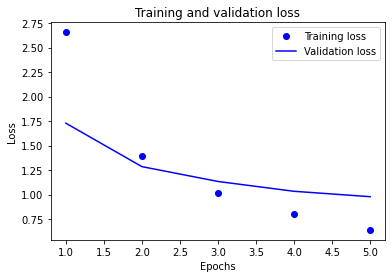

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

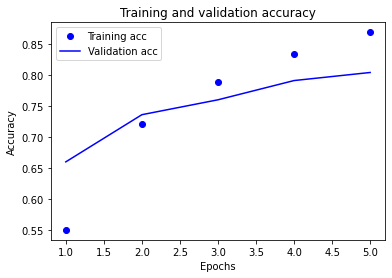

In [25]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
#정확도
results

[1.0272432565689087, 0.7773820161819458]

In [18]:
predictions = model.predict(x_test)

In [19]:
#길이가 46인 벡터
predictions[0].shape

(46,)

In [20]:
predictions[0]

array([8.88196373e-05, 2.23651761e-03, 3.35147924e-05, 8.41953039e-01,
       1.33898064e-01, 8.31021753e-05, 7.20805081e-04, 1.37630690e-04,
       2.46355147e-03, 2.92631274e-04, 2.68689269e-04, 7.28778134e-04,
       7.76481174e-05, 7.27739476e-04, 7.86617049e-04, 3.08698131e-04,
       2.31606863e-03, 3.90177069e-04, 3.79453049e-05, 6.83140534e-04,
       2.30457610e-03, 1.60449796e-04, 2.66970674e-05, 5.76905033e-04,
       1.09846755e-04, 3.86797445e-04, 7.00788878e-05, 4.16728981e-05,
       4.88320540e-04, 4.79923212e-04, 9.02424799e-04, 2.13970523e-03,
       1.26812025e-04, 1.33172853e-05, 3.33656237e-04, 1.75713431e-05,
       2.36480194e-03, 1.63597229e-04, 9.61341430e-05, 4.05767496e-04,
       1.14551680e-04, 2.20637012e-04, 4.21158584e-05, 1.18931021e-04,
       3.54957629e-05, 2.61280929e-05], dtype=float32)

In [26]:
np.sum(predictions[0])

1.0000001

In [36]:
import numpy as np

a = np.array([0,1,2])
b = np.array([[1,5],[2,7]])

print(b.shape)

#(3,)인덱스가 3개인 1차원 벡터
#(2,2) 인덱스가 2개인 2차원 벡터

(2, 2)


In [28]:
a = [1., 2.]
a

#소숫점이 생략된 표시

[1.0, 2.0]